In [41]:
#import modules
%matplotlib inline
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib as plt

In [16]:
# If not in the same folder(url instead of folder name): 
# url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/Lab1/stud.csv'
df = pd.read_csv('stud.csv', sep=',')
df.head()


,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0


In [28]:
# Printing the whole set
df

,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0
5,88403,29,s88403@oslomet.no,11,62.0
6,56387,32,s56387@oslomet.no,9,29.0
7,95648,23,s95648@oslomet.no,3,38.0
8,63176,20,s63176@oslomet.no,0,98.0
9,15406,31,s15406@oslomet.no,2,68.0


In [17]:
# Info about the colums -- sees that there are objects. Why?
df.info()
# As you can see, row 30 and 41 have missing values. So for us to convert the columns into int type, we need to decide what we want to do with them.

#Delete the row ( this could be a good solution if we have a big dataset or we need to have reliable data)
Fill the empty value with a dummy value
#Lets say that "Age" isen't to important, and we decide to fill empty values with 0, but we don't want to fill dummy data for hrsStudy, so we will delete rows with empty data here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [18]:
#lets see how many empty cells we got
df.isna().sum()
# This can't be correct, we have seen that we have at least 1 empty cell in both Age and hrsStudy.. Lets fix this by using np.nan

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    1
dtype: int64

In [20]:
#Lets first replace all empty cells wit np.nan
df = df.replace (r'^\s*$' , np.nan, regex=True)

In [30]:
#When dealing with missing values, we need to make to figure out if we can replace data
#with dummy values. Lets say Age isn't too important in this dataset, and we can replace missing
#age values with 0
df["Age"].replace(np.nan, 0, inplace=True)
#df = df['Age'].astype(str).astype(int)

In [31]:
#and check again
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [32]:
#Since we believe the rest of the columns contains important data, we won't replace nan values with dummy data
#We will therefor delete rows containing nan data
df.dropna(inplace = True)
# inplace = True updates the df with the new data, alternative you can do df = df.dropna() or Newdf = df.dropna()
#And lets check again
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    0
dtype: int64

In [33]:
#A easy way to convert object to int, is through sting, so we convert all values to strings, then ints
df['Age'] = df['Age'].astype(str).astype(int)
df['hrsStudy'] = df['hrsStudy'].astype(str).astype(int)

In [34]:
#So lets see then..
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   48 non-null     int64  
 1   Age         48 non-null     int64  
 2   email       48 non-null     object 
 3   hrsStudy    48 non-null     int64  
 4   FinalGrade  48 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ KB


,StudentID,Age,hrsStudy,FinalGrade
count,48.000000,48.000000,48.000000,48.000000
mean,50338.166667,35.666667,6.395833,72.083333
std,26526.981827,52.388619,3.648022,91.362461
min,11758.000000,0.000000,0.000000,24.000000
25%,28399.750000,22.000000,3.000000,38.750000
50%,45986.500000,25.000000,7.000000,61.000000
75%,71524.000000,31.000000,10.000000,78.500000
max,99823.000000,333.000000,11.000000,673.000000


<Axes: >

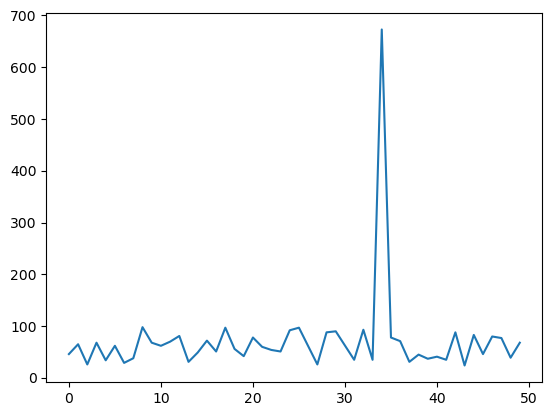

In [35]:
#We can now start to look for values that might be wrong.
#An example for FinalGrade, we see from df.describe() that the max value is 673, this is clearly wrong
#A way to visualize this is to do a plot

df["FinalGrade"].plot.line()

<Axes: >

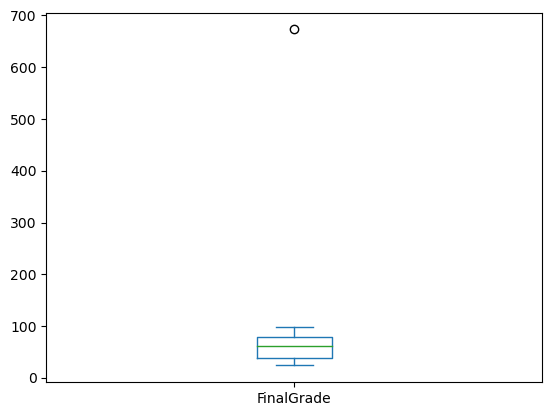

In [37]:
df["FinalGrade"].plot.box()

In [43]:
#We will look closer at removing outliers later, but we can remove them using the scipy package
#Calculate the z score
z_scores = stats.zscore(df["FinalGrade"])
abs_z_scores = np.abs(z_scores)

In [44]:
#And drop all rows in the third quantile
df.drop(df[abs_z_scores > 3].index, inplace=True)

<Axes: >

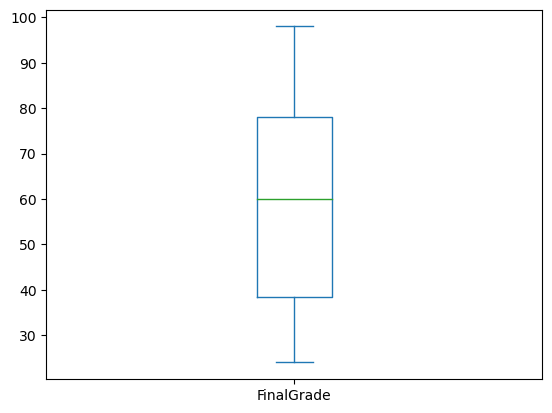

In [45]:
#Checking the column again to see if outliers are gone..
df["FinalGrade"].plot.box()

In [46]:
#Lets take a look at the end of our dataframe..
df.tail(5)


,StudentID,Age,email,hrsStudy,FinalGrade
45,62039,23,s62039@oslomet.no,4,46.0
46,42989,27,s42989@oslomet.no,0,80.0
47,85370,29,s85370@oslomet.no,2,77.0
48,63135,26,s63135@oslomet.no,9,39.0
49,28895,19,s28895@oslomet.no,10,68.0


In [47]:
#As you can see, the index counts to 49, but we have dropped several values.. to reset the index you can use
df = df.reset_index(drop=True)
df.tail(5)

,StudentID,Age,email,hrsStudy,FinalGrade
42,62039,23,s62039@oslomet.no,4,46.0
43,42989,27,s42989@oslomet.no,0,80.0
44,85370,29,s85370@oslomet.no,2,77.0
45,63135,26,s63135@oslomet.no,9,39.0
46,28895,19,s28895@oslomet.no,10,68.0


In [49]:
# create a list of our conditions
conditions = [
    (df['FinalGrade'] <= 50.0),
    (df['FinalGrade'] > 50.0) & (df['FinalGrade'] <= 60.0),
    (df['FinalGrade'] > 60.0) & (df['FinalGrade'] <= 70.0),
    (df['FinalGrade'] > 70.0) & (df['FinalGrade'] <= 80.0),
    (df['FinalGrade'] > 80.0) & (df['FinalGrade'] <= 90.0),
    (df['FinalGrade'] > 90.0)
    ]

# create a list of the values we want to assign for each condition
values = ['F', 'E', 'D', 'C', 'B', 'A']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Grade'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade,Grade
0,47412,20,s47412@oslomet.no,5,46.0,F
1,15077,22,s15077@oslomet.no,0,65.0,D
2,15467,27,s15467@oslomet.no,1,26.0,F
3,17907,21,s17907@oslomet.no,6,68.0,D
4,13352,333,s13352@oslomet.no,4,34.0,F


In [51]:
#We can now see how many got the different grades by using groupby
df_gradeCount = df.groupby('Grade').count()

In [52]:
df_gradeCount.FinalGrade

Grade
A     5
B     5
C     6
D     7
E     5
F    19
Name: FinalGrade, dtype: int64

<Axes: xlabel='Grade'>

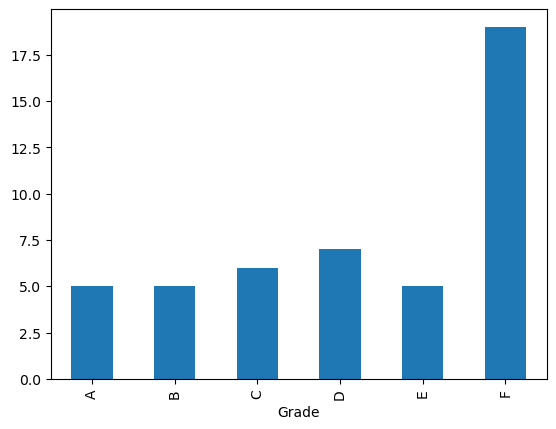

In [53]:
#And plot a barplot of the data

df_gradeCount["FinalGrade"].plot.bar()

Lets have a quick look at some other plots as well

<Axes: xlabel='Age', ylabel='Grade'>

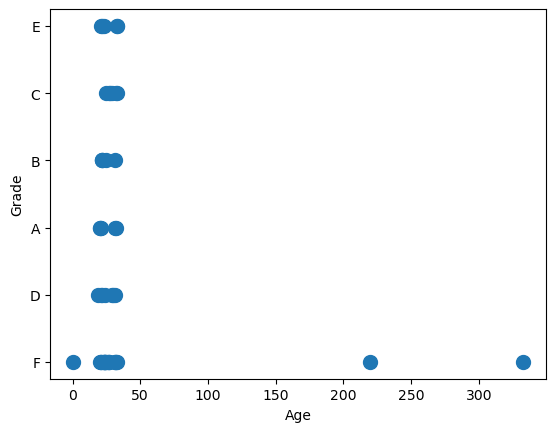

In [54]:
df.plot.scatter(x = 'Age', y = 'Grade', s = 100)

<Axes: xlabel='Age', ylabel='Grade'>

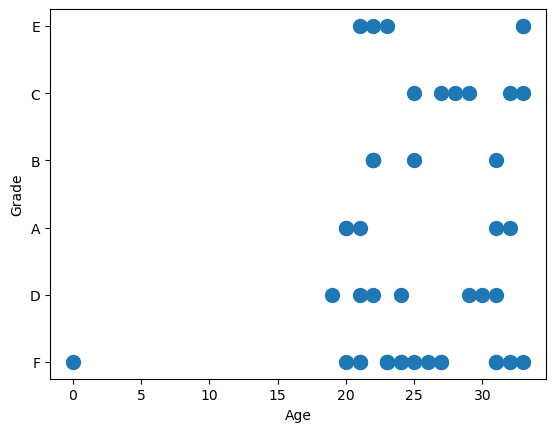

In [55]:
#Lets just remove the two outliers for a nicer plot.
z_scores = stats.zscore(df["Age"])
abs_z_scores = np.abs(z_scores)
df.drop(df[abs_z_scores > 3].index, inplace=True)
df.plot.scatter(x = 'Age', y = 'Grade', s = 100)


<Axes: ylabel='Frequency'>

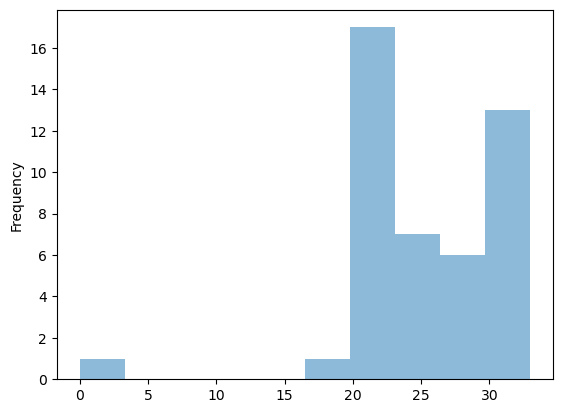

In [56]:
df["Age"].plot.hist(alpha=0.5)

<Axes: xlabel='Grade'>

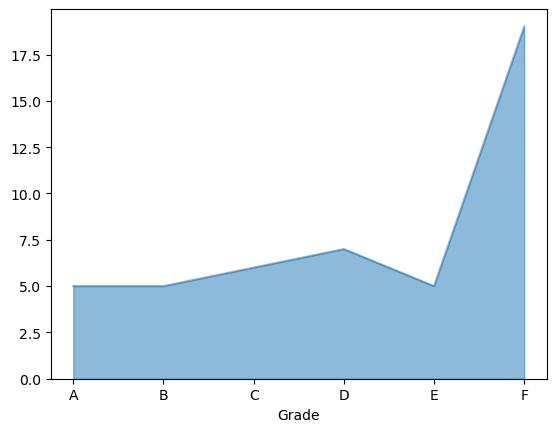

In [57]:
df_gradeCount["FinalGrade"].plot.area(stacked=False)